This tutorial describes how a camera can be calibrated using a 3d checkerboard.  

First, we take an image of the checkerboard (the board length is 16.13mm), which is shown as follows: 

<img src='3d_checkerboard.jpg' style='zoom:50%' >

Then, we detect the checkerboard to get the keypoints pixel coordinates (tips: you can use auto-detection tools such as cv2.findChessboardCorners). Here we provide a function to complete this step. You can run the following code to get the keypoints coordinates or load our keypoints coordinates directly from .npy file. 

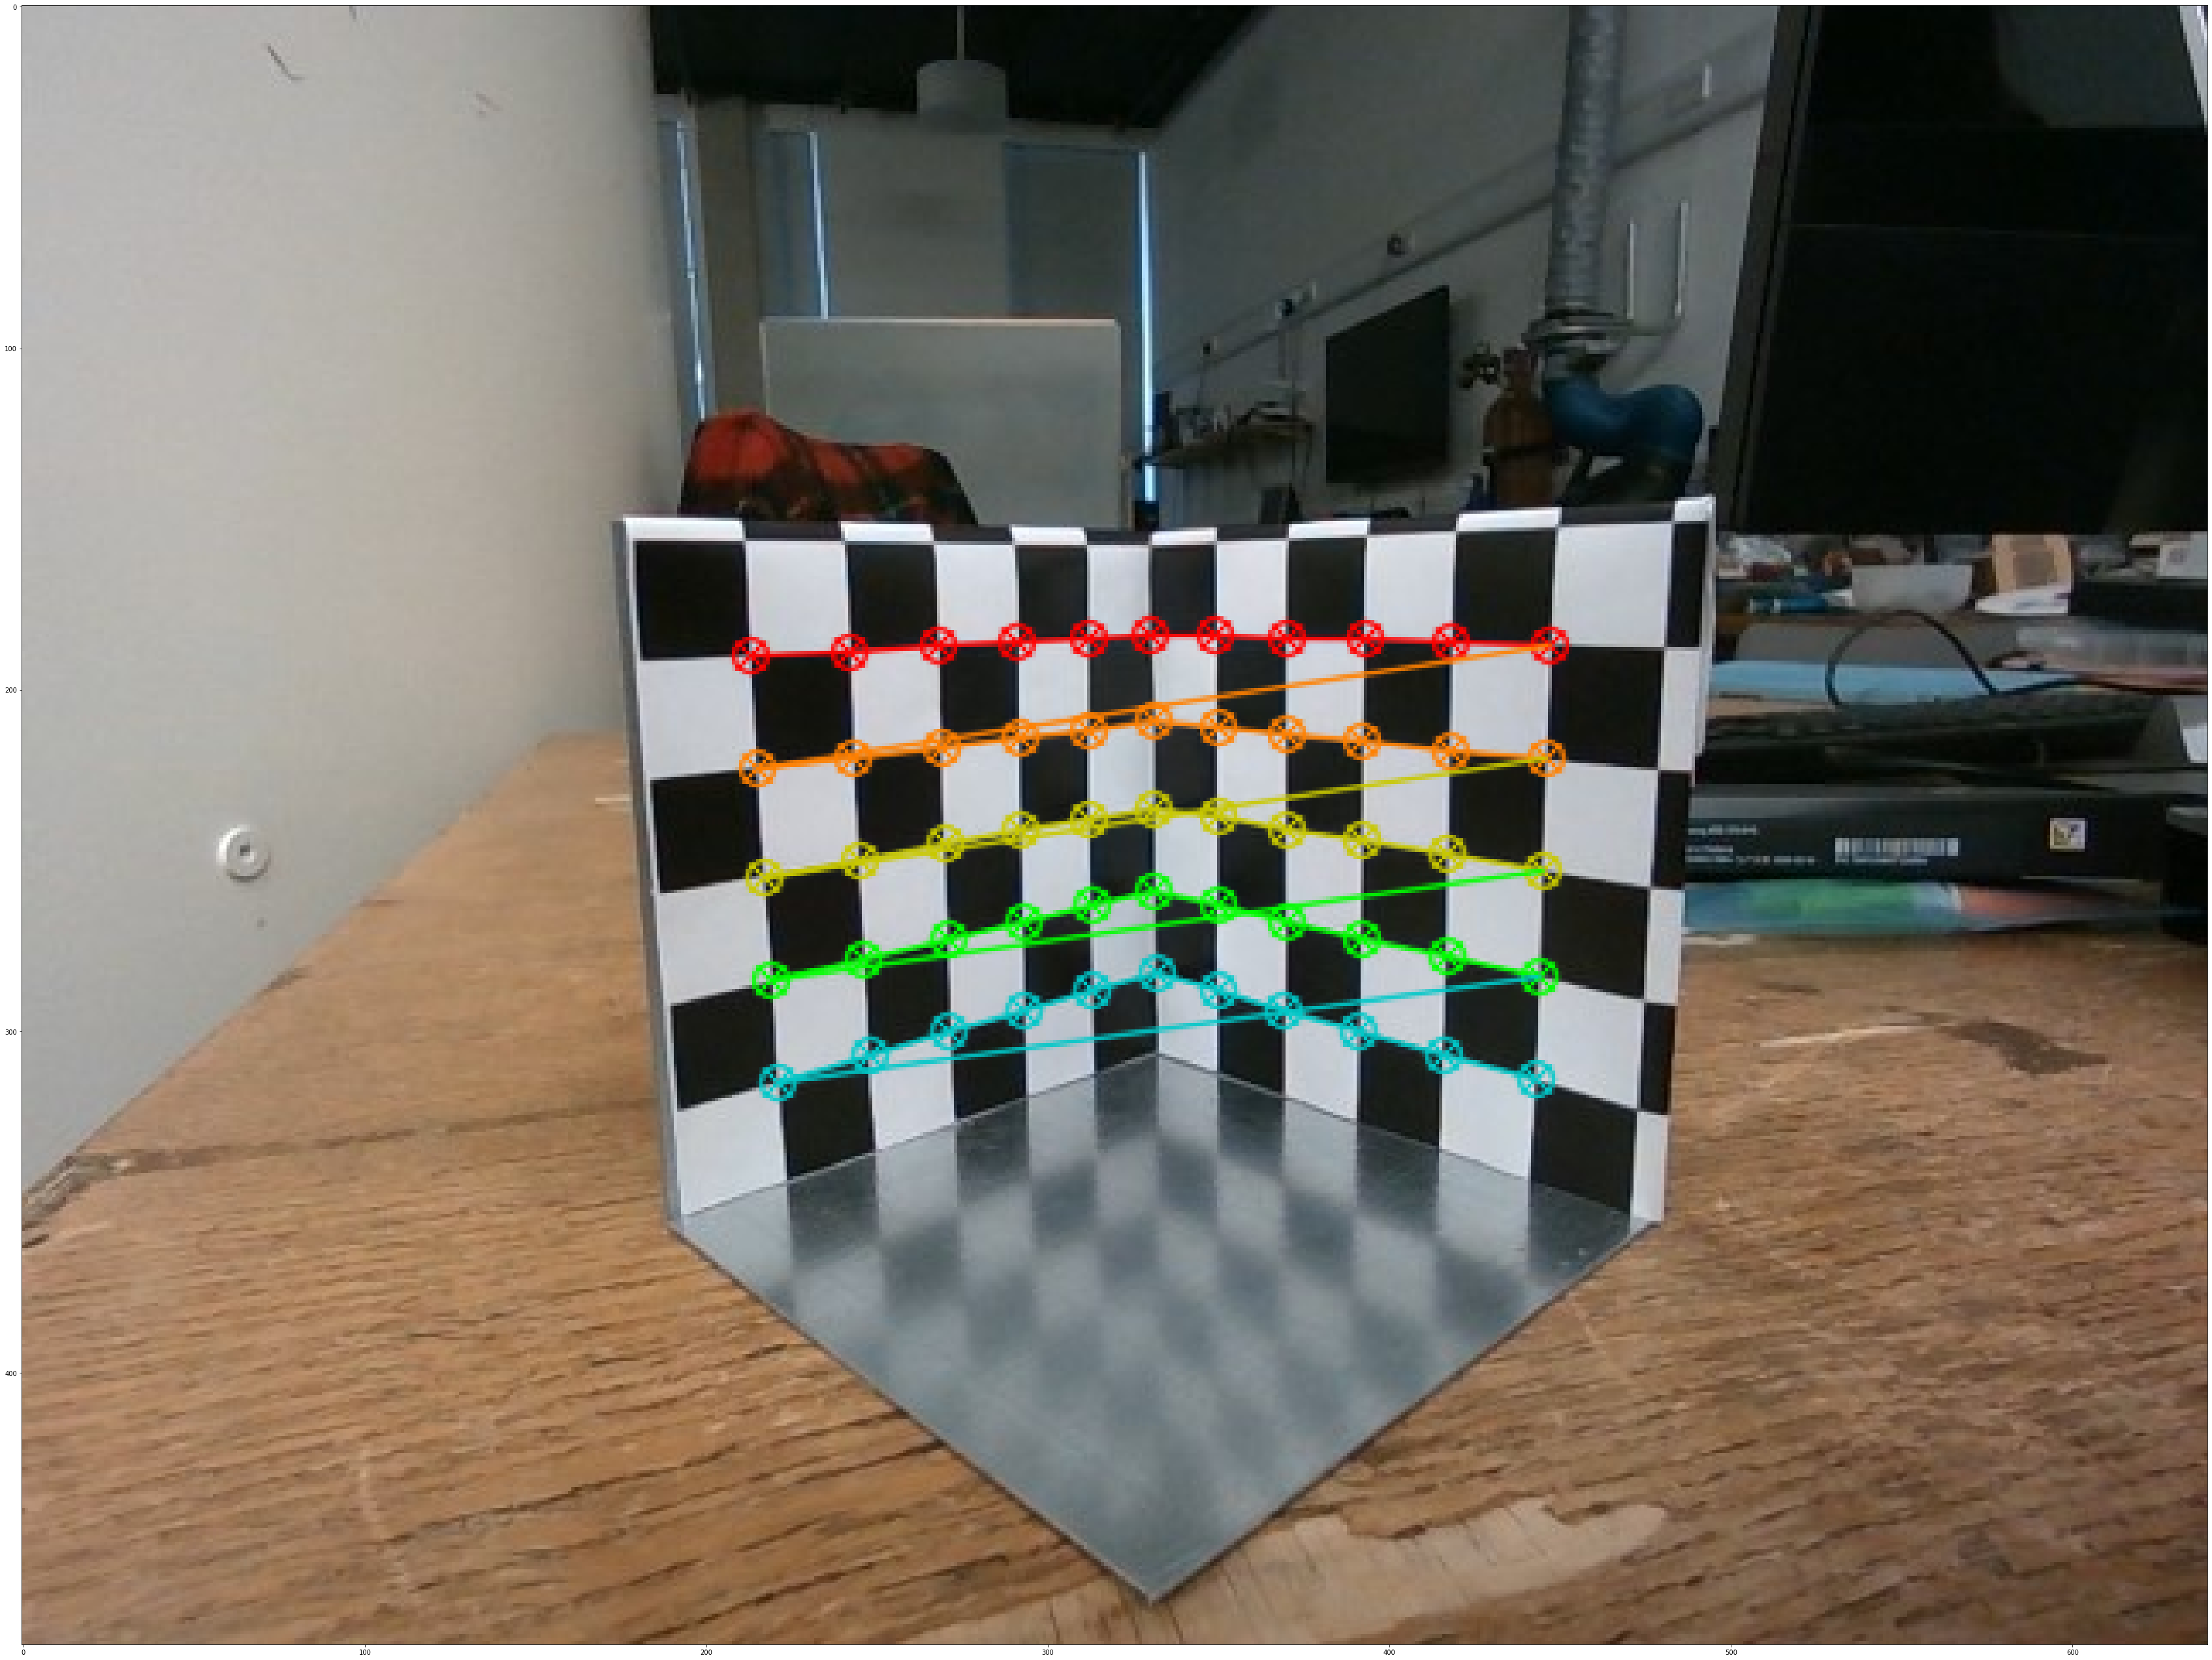

img_point [[212.9601  190.03268]
 [242.34784 188.59268]
 [268.27267 187.35106]
 [291.4555  185.98976]
 [311.83688 184.97488]
 [330.06613 183.78017]
 [349.46237 184.36655]
 [369.6816  184.93414]
 [392.54382 185.45903]
 [418.35596 186.21812]
 [447.39636 186.83086]
 [214.74394 222.82722]
 [243.30914 219.60344]
 [268.76273 216.76488]
 [291.614   214.16098]
 [311.85614 211.72234]
 [331.0789  209.43044]
 [349.53976 211.25851]
 [369.64273 213.1657 ]
 [392.25238 215.45107]
 [417.62405 217.74573]
 [445.98788 220.3686 ]
 [216.79335 254.54445]
 [244.59872 249.7969 ]
 [269.58884 245.45255]
 [292.07263 241.49678]
 [312.13788 237.78647]
 [331.22617 234.53676]
 [349.54944 237.44075]
 [369.58325 240.73201]
 [391.98145 244.35603]
 [417.1562  248.2946 ]
 [444.76782 252.80682]
 [219.32683 285.31757]
 [246.29843 279.0685 ]
 [270.6984  273.3842 ]
 [292.58447 268.07642]
 [312.69437 263.3435 ]
 [331.33664 259.11142]
 [349.60352 263.11868]
 [369.6645  267.52252]
 [391.6024  272.50055]
 [416.57224 277.81906]
 

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt


def detect_keypoints(img,checkerboard_size):
    '''
    find checkerboard keypoints
    
    Args:
        image (np.ndarray): Image (height x width x 3).
        checkerboard size (int,int): Number of inner corners per a chessboard row and column
        
    Returns:
        np.ndarray: Output array of detected corners (inner corners number x 2). 
    ''' 
    ret,corners=cv2.findChessboardCorners(img,checkerboard_size,None)

    # refine the corner locations with sub-pixel accuracy
    if ret==True:
        criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 3, 0.1) # stop after 3 iterations or the accuracy of 0.1 is achieved
        img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        corners2=cv2.cornerSubPix(img_gray,corners,(5,5),(-1,-1),criteria) 
        img_points.append(corners2)

    img_corner=cv2.drawChessboardCorners(img,checkerboard_size,corners2,ret) # draw detected corners
    img_corner2 = img_corner[:,:,::-1] 	# transform image from bgr to rgb
    plt.figure(figsize=(60,60))
    plt.imshow(img_corner2)
    plt.show()
#     cv2.imshow('img with detected corners', img_corner)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

    return np.reshape(img_points, (-1, 2))



img=cv2.imread('3d_checkerboard.jpg',cv2.IMREAD_COLOR)
img_points=[]
checkerboard_size=(11,5)   # Number of inner corners per a chessboard row and column is 11 and 5
checkerboard_length=16.13  # the board length is 16.13mm 

img_points=detect_keypoints(img,checkerboard_size)

# # -------you can also load the checkerboard keypoints in pixel direcly------
# img_points = np.load('img_points.npy')
# # -----------------------------------------------------------------

print('img_point',img_points)

Next, we fix world coordinate. We set the origin of the world coordinate at the corner of the 3d checkerboard and set the world coordinate as a right-hand coordinate, which is shown as follows:
<img src='3d_coordinate.jpg' style='zoom:50%' >

You can run the following code to get the the keypoints world coordinates, or load our world coordinates directly from .npy file. 

In [3]:
def fix_world_points(checkerboard_size,checkerboard_length):
    # fix the world coordinate and get cooresponding keypoints in the world coordinates
    num_h=checkerboard_size[0]
    num_v=checkerboard_size[1]
    objp = []

    for i in range(num_v):
        for j in range(num_h):
            if j<6:
                # objp_point=[0,(5-j)*checkerboard_length,(5-i)*checkerboard_length]
                objp_point=[(5-j)*checkerboard_length,0,(5-i)*checkerboard_length]
                objp.append(objp_point)
            else:
                # objp_point=[(j-5)*checkerboard_length,0,(5-i)*checkerboard_length]
                objp_point=[0,(j-5)*checkerboard_length,(5-i)*checkerboard_length]
                objp.append(objp_point)


    return np.reshape(np.array(objp), (-1, 3))


world_points=fix_world_points(checkerboard_size,checkerboard_length)
# # -------you can also load the checkerboard keypoints in world coordinate direcly------
# world_points = np.load('world_points.npy')
# # -------------------------------------------------------------------------------------

print(world_points)

[[80.65  0.   80.65]
 [64.52  0.   80.65]
 [48.39  0.   80.65]
 [32.26  0.   80.65]
 [16.13  0.   80.65]
 [ 0.    0.   80.65]
 [ 0.   16.13 80.65]
 [ 0.   32.26 80.65]
 [ 0.   48.39 80.65]
 [ 0.   64.52 80.65]
 [ 0.   80.65 80.65]
 [80.65  0.   64.52]
 [64.52  0.   64.52]
 [48.39  0.   64.52]
 [32.26  0.   64.52]
 [16.13  0.   64.52]
 [ 0.    0.   64.52]
 [ 0.   16.13 64.52]
 [ 0.   32.26 64.52]
 [ 0.   48.39 64.52]
 [ 0.   64.52 64.52]
 [ 0.   80.65 64.52]
 [80.65  0.   48.39]
 [64.52  0.   48.39]
 [48.39  0.   48.39]
 [32.26  0.   48.39]
 [16.13  0.   48.39]
 [ 0.    0.   48.39]
 [ 0.   16.13 48.39]
 [ 0.   32.26 48.39]
 [ 0.   48.39 48.39]
 [ 0.   64.52 48.39]
 [ 0.   80.65 48.39]
 [80.65  0.   32.26]
 [64.52  0.   32.26]
 [48.39  0.   32.26]
 [32.26  0.   32.26]
 [16.13  0.   32.26]
 [ 0.    0.   32.26]
 [ 0.   16.13 32.26]
 [ 0.   32.26 32.26]
 [ 0.   48.39 32.26]
 [ 0.   64.52 32.26]
 [ 0.   80.65 32.26]
 [80.65  0.   16.13]
 [64.52  0.   16.13]
 [48.39  0.   16.13]
 [32.26  0.  

For now, we have already got 3d-2d matching pairs. You can try to calibrate the camera following the stpes shown in our slides.
The functions below are just for reference. You can also define your own functions.

In [3]:
def coefficients_from_3d_2d(image: np.ndarray, world: np.ndarray):
    """Get coefficients for the polynomial equation.

    Args:
        image (np.ndarray): 2D vector (u, v).
        world (np.ndarray): 3D vector (x, y, z).

    Returns:
        np.ndarray: Coefficients of 2 rows of A (2x12).
    """
    # P = [p11 p12 p13 p14 p21 p22 p23 p24 p31 p32 p33 p34]
    res = np.zeros((2, 12))

    # ----------your code goes here-------------
    
    return res


def solve_P(A: np.ndarray):
    """Solve for P using A.

    Args:
        A (np.ndarray): Matrix A (2N, 12).

    Returns:
        np.ndarray: Matrix P (3x4).
    """
    
    #     for SVD, you can use np.linalg.svd()
    # ----------your code goes here-------------
    
    return P


def decompose_P(P: np.ndarray):
    """Decompose P into K, R, t.

    Args:
        P (np.ndarray): Matrix P (3x4).

    Returns:
        K (np.ndarray): Matrix K (3x3).
        R (np.ndarray): Matrix R (3x3).
        t (np.ndarray): Matrix t (3x1).
    """
    
    # ----------your code goes here-------------
    
    return K, R, t


def calibrate_3d_2d(image_points: np.ndarray, world_points: np.ndarray):
    """Calibrate 3D to 2D.

    Args:
        image_points (np.ndarray): 2D points (N, 2).
        world_points (np.ndarray): 3D points (N, 3).

    Returns:
        K (np.ndarray): Matrix K (3x3).
        R (np.ndarray): Matrix R (3x3).
        t (np.ndarray): Matrix t (3x1).
    """
    
    A = np.zeros((2 * image_points.shape[0], 12))
    for i in range(image_points.shape[0]):
        A[2 * i: 2 * i +
            2] = coefficients_from_3d_2d(image_points[i], world_points[i])
    P = solve_P(A)
    K, R, t = decompose_P(P)
    return K, R, t



K, R, t = calibrate_3d_2d(img_points, world_points)
print(K, R, t)


[[386.60482339  -0.39713299 324.06847461]
 [  0.         387.56416596 232.96609463]
 [  0.           0.           1.        ]] [[-0.72548527  0.68808794 -0.01435611]
 [ 0.12212489  0.1081781  -0.98660175]
 [-0.67731575 -0.71751828 -0.16251428]] [  5.24018066  48.71641014 257.76070876]


In [3]:
# # To verify if your answer is correct, we can use the intrinsic matrix R, rotation vector, and translation vector to project a point from world coordiante to image coordinate
# rvec, _=cv2.Rodrigues(R)
# point3d=np.array([[80.65 , 0. ,  80.65]])
# proj,_=cv2.projectPoints(point3d,rvec,t,K,None)
# print(proj)
